# Clustering

Vamos a trabajar con el método K-means y evaluaremos las métricas vistas en la teoría.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

c:\Users\apacek\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\apacek\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\apacek\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


Para empezar, vamos a generarnos una serie de datasets sintéticos con las funciones que ya vienen incorporadas en Scikit-learn. Notemos que estos datos vienen con una etiqueta asociada donde nos indica a qué cluster pertenecen. La idea será utilizar los métodos de clusting estudiados para poder identificar los clusters sin conocer esta etiqueta.

In [ ]:
from sklearn.datasets import make_blobs, make_moons

X1, y1 = make_blobs(n_samples=1000, centers=4, cluster_std=0.5, n_features=2, random_state=0)
X2, y2 = make_blobs(n_samples=1000, centers=4, cluster_std=1, n_features=2, random_state=0)
X3, y3 = make_moons(n_samples=1000, noise=.05, random_state=0)

Grafiquemos los datasets para ver las diferencias entre cada uno.

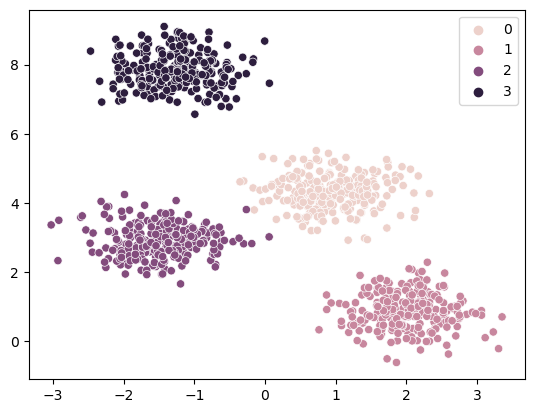

In [ ]:
sns.scatterplot(x = X1[:,0], y = X1[:,1], hue = y1)
plt.show()

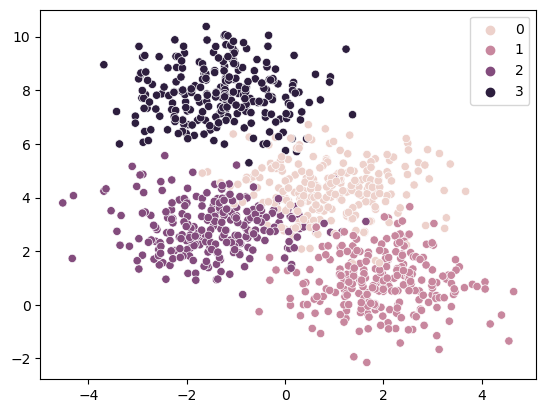

In [ ]:
sns.scatterplot(x = X2[:,0], y = X2[:,1], hue = y2)
plt.show()

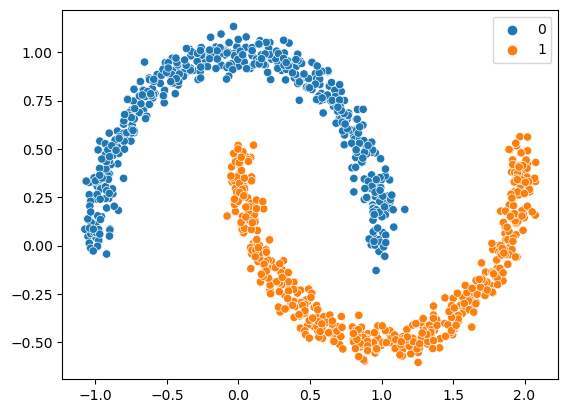

In [ ]:
sns.scatterplot(x = X3[:,0], y = X3[:,1], hue = y3)
plt.show()

A simple vista, ¿Creen que K means es capaz de identificar correctamente los clusters en los 3 casos?

## K-means

Scikit-Learn tiene una implementación del método que vimos en la clase llamada KMeans.

1. Leer la documentación, siempre debería ser el primer paso. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

2. Definimos los 3 modelos para los distintos datasets. Definir los parámetros n_clusters (según corresponda en cada caso basándose en los 3 gráficos de arriba) y un random_state=0 para que todos obtengamos resultados similares.

In [ ]:
from sklearn.cluster import KMeans

kmeans_1 = KMeans(n_clusters=4, random_state=0)
kmeans_2 = KMeans(4, random_state=0)
kmeans_3 = KMeans(2, random_state=0)

Entrenamos los modelos con los datos. En este paso hay una diferencia importante con lo que veníamos haciendo en aprendizaje supervisado. ¿Cuál es?

In [ ]:
kmeans_1.fit(X1)
kmeans_2.fit(X2)
kmeans_3.fit(X3)

KMeans(n_clusters=2, random_state=0)

Luego de entrenar los modelos, podemos consultar las etiquetas que se le asignó a cada instancia y el lugar de los centroides.

In [ ]:
etiquetas_1 = kmeans_1.labels_
print(etiquetas_1.shape)

(1000,)


In [ ]:
np.unique(etiquetas_1)

array([0, 1, 2, 3])

Centroides:

In [ ]:
centros_1 = kmeans_1.cluster_centers_
print(centros_1)

[[-1.27283855  7.84651464]
 [ 2.01942692  0.87474842]
 [-1.49807428  2.90164881]
 [ 0.92917513  4.29023124]]


Completar la siguiente celda:

In [ ]:
etiquetas_2 = kmeans_2.labels_
centros_2 = kmeans_2.cluster_centers_
etiquetas_3 = kmeans_3.labels_
centros_3 = kmeans_3.cluster_centers_

Ploteamos los resultados para todos los datasets. ¿Les parece que la separación fue adecuada?

c:\Users\apacek\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\apacek\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


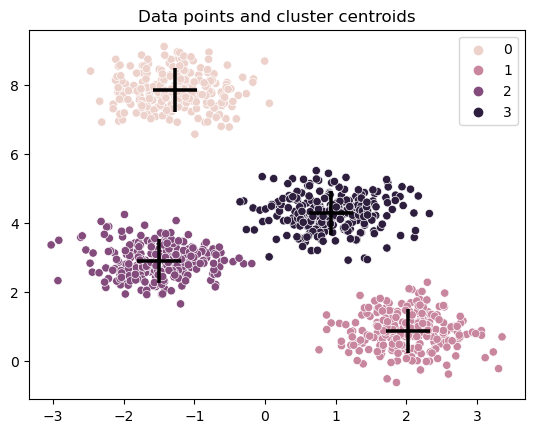

In [ ]:
sns.scatterplot(X1[:, 0], X1[:, -1], hue = etiquetas_1) # Noten que aca pasamos las etiquetas del CLUSTERING (no las originales)
sns.scatterplot(centros_1[:, 0], centros_1[:, 1],color='black', marker="+", s=1000)
plt.title('Data points and cluster centroids')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


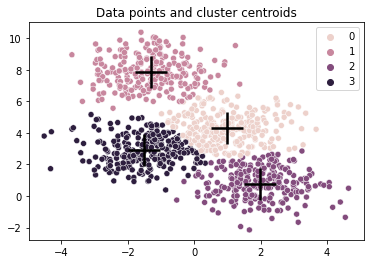

In [ ]:
sns.scatterplot(X2[:, 0], X2[:, -1], hue = etiquetas_2)
sns.scatterplot(centros_2[:, 0], centros_2[:, 1],color='black', marker="+", s=1000)
plt.title('Data points and cluster centroids')
plt.show()

c:\Users\apacek\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\apacek\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


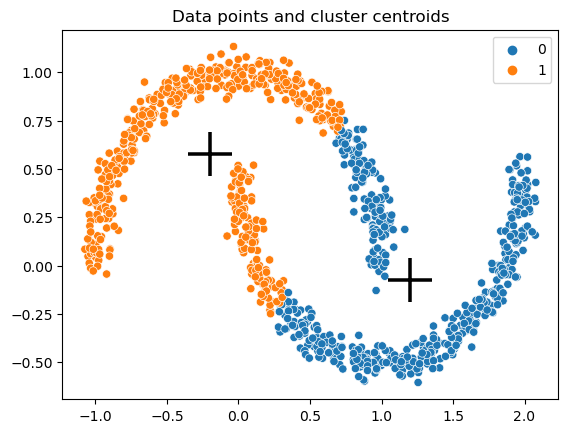

In [ ]:
sns.scatterplot(X3[:, 0], X3[:, -1], hue = etiquetas_3)
sns.scatterplot(centros_3[:, 0], centros_3[:, 1],color='black', marker="+", s=1000)
plt.title('Data points and cluster centroids')
plt.show()

¿ Qué pasa si no elegimos correctamente el número de clusters ?

c:\Users\apacek\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\apacek\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


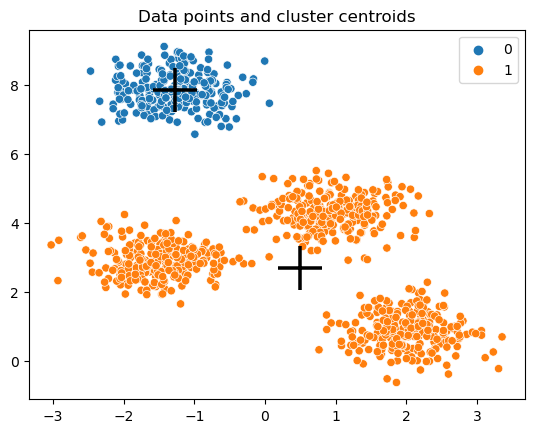

In [ ]:
kmeans_1_mal = KMeans(2, random_state=0).fit(X1)
etiquetas_1_mal = kmeans_1_mal.labels_
centros_1_mal = kmeans_1_mal.cluster_centers_

sns.scatterplot(X1[:, 0], X1[:, -1], hue = etiquetas_1_mal) # Noten que aca pasamos las etiquetas del CLUSTERING (no las originales)
sns.scatterplot(centros_1_mal[:, 0], centros_1_mal[:, 1],color='black', marker="+", s=1000)
plt.title('Data points and cluster centroids')
plt.show()

# Inercia

Vamos a evaluar las particiones que realizamos mediante KMeans usando la inercia. La idea es que al variar el número de clúster K en el modelo, el valor de la distancia media de los datos al centroide más cercano va a variar. Queremos graficar esa curva para elegir el número de particiones óptimos con el metodo del codo.

Uno de los atributos de kmeans en sklearn es inertia (pueden ver la doc):

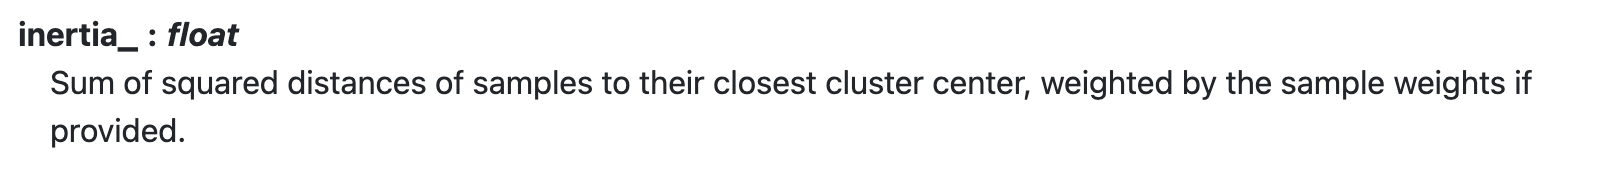

Utilizando este atributo:

- Aplicar a el dataset 1 (X1) Kmeans con distintos valores de K: de 2 a 12.
- En cada iteración almacenar el resultado de inertia_ en una lista con el nombre **lista_inercias**

In [ ]:
K = np.arange(2,13)

In [ ]:
lista_inercias = []

for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X1)
    inercia = km.inertia_
    lista_inercias.append(inercia)


Ahora graficamos la inercia por cantidad de clusters:

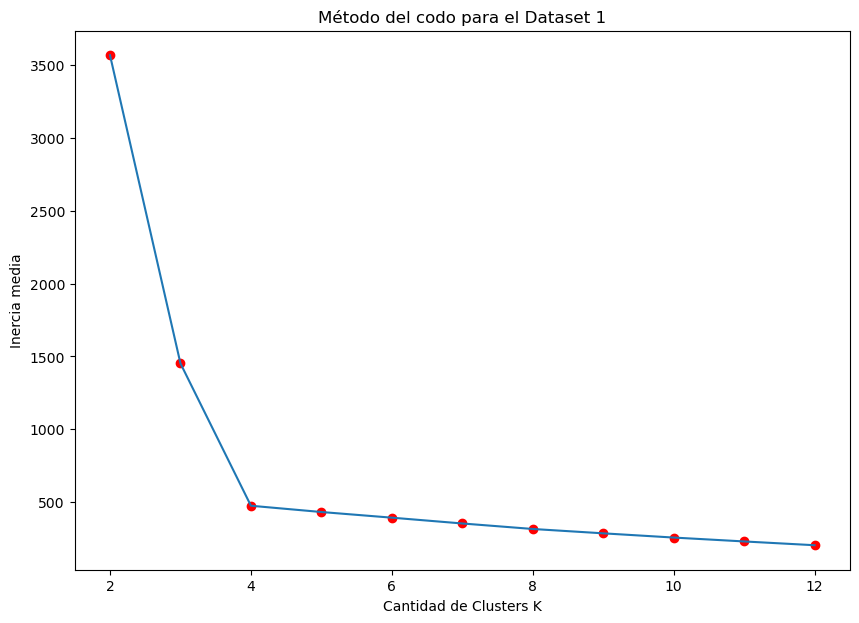

In [ ]:
plt.figure(figsize = (10,7))
plt.plot(K,lista_inercias)
plt.scatter(K,lista_inercias,c='r')
plt.xlabel('Cantidad de Clusters K')
plt.ylabel('Inercia media')
plt.title('Método del codo para el Dataset 1')

plt.show()

¿Pueden ver el "codo"?

# Silhouette

Vamos a evaluar las particiones que realizamos mediante el valor de silhouette.

Vamos a calcular el valor de silhouette promedio para distintos valores de K. La manera de hacerlo es igual a la que usamos para calcular los valores de inercia, vamos a recorrer con un for los distintos modelos e ir agregando a una lista los valores. Esta vez, en lugar de calcular la inercia, vamos a calcular el valor de silhouette usando la función silhouette_score.


Importar silhouette_score

In [ ]:
from sklearn.metrics import silhouette_score

Ahora, de la misma forma que hicimos con el método del codo, calcular el silhouette score para cada valor de k (entre 2 y 12) para el dataset X1 y plotear.

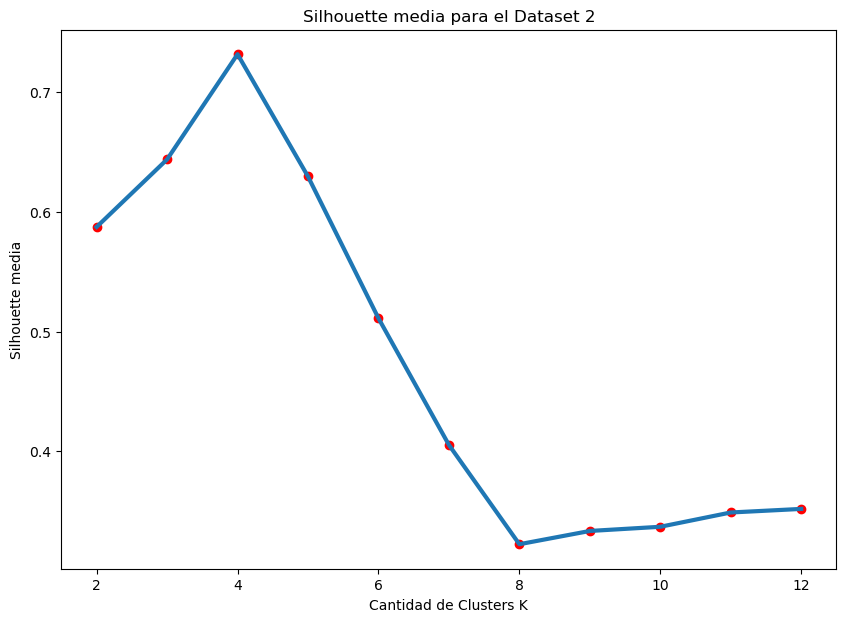

In [ ]:
lista_sil = []

for k in range(2,13):
    km = KMeans(n_clusters=k)
    km = km.fit(X1)

    etiquetas = km.labels_

    valor_medio_sil = silhouette_score(X1, etiquetas)
    lista_sil.append(valor_medio_sil)

plt.figure(figsize = (10,7))
plt.plot(K, lista_sil, lw=3)
plt.scatter(K, lista_sil, c='r')
plt.xlabel('Cantidad de Clusters K')
plt.ylabel('Silhouette media')
plt.title('Silhouette media para el Dataset 2')

plt.show()